In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
data= pd.read_csv("./data/Taitanic_train.csv")
data.head()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA는 탐색적 데이터분석
- 데이터의 특성, 분포, 변환
     - pclass를 역 코딩한다던가, str로 채워진 컬럼을 숫자화.
     - 분포가 치우치지는 않았는지 
     - 상관관계가 높은 컬럼들 중 무엇을 남길지.
- 수치형과 범주형 데이터를 구분하여 분석.
    - 수치형의 데이터프레임과 범주형은 각각 따로

In [6]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
# 결측치 처리
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data=data.drop('Cabin',axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [13]:
data.isna().sum() #결측치 없음 확인.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 범주형 데이터와 수치형 데이터 분리
범주형은 object
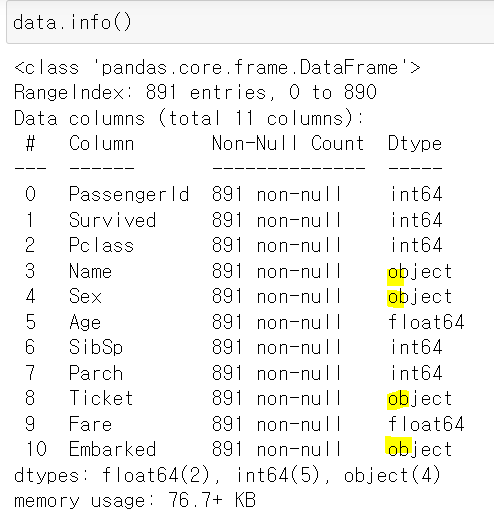

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
# 범주형과 수치형 데이터 분리
categorical_1 = data[['Name','Sex','Ticket','Embarked']]
numerical_1= data[['Survived','Pclass','Age', 'SibSp','Parch','Fare']]
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [28]:
numerical_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# for: 변수이름 일일이 복붙하지 않도록 
for cat_cols in categorical_1:
    print(cat_cols)
    print(data[cat_cols].value_counts())

Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
Sex
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Leng

### dtype을 출력해 조건문으로 범주와수치형 분리하기

In [30]:
# 딕셔너리를 반복문 돌리면 키가 나옴
for col in data:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


In [31]:
# 컬럼별로 출력하려면 키를 인덱싱
for col in data:
    print(data[col])

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, 

In [32]:
# dtype을 뽑기
for col in data:
    print(col, data[col].dtype)

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Embarked object


In [33]:
# dtype에 조건문걸기

categorical_2_cols=[]
numerical_2_cols=[]

for col in data:
    if data[col].dtype == 'object':
        categorical_2_cols.append(col)
        
    else:
        numerical_2_cols.append(col)

print(categorical_2_cols)
print(numerical_2_cols)

['Name', 'Sex', 'Ticket', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [35]:
# 문자형에 맞게 나온것들만 df로 보기
data[numerical_2_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


### select_dtypes()를 이용해 변수 구분하기(범주형, 수치형)

In [36]:
# select_dtypes(include=['object']) 해당하는것만 
cate_cols=data.select_dtypes(include=['object'])

In [37]:
# select_dtypes(exclude=['object']) 해당하지 않는 것들만
num_cols=data.select_dtypes(exclude=['object'])

In [39]:
for col in cate_cols:
    print(cate_cols[col].value_counts())

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: 

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: 

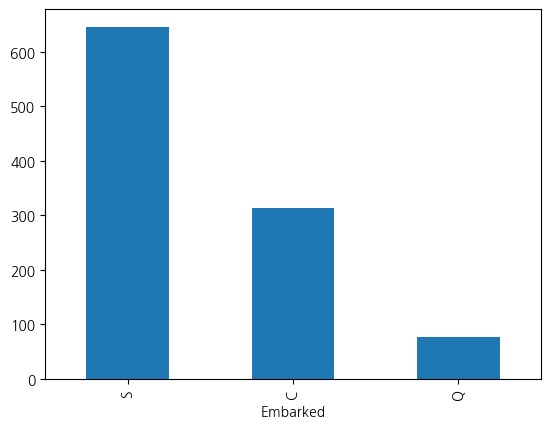

In [40]:
# 결과물 하단부에 막대그래프도 넣기
for col in cate_cols:
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')

## 모든 데이터를 보아야한다. 
이중 passengerId를 보겠음
    - 중복되는건 없는지

In [41]:
print(data['PassengerId'].unique())
# 중복될수도없고 살펴보는 의미가 없음 다음 컬럼.

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [43]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

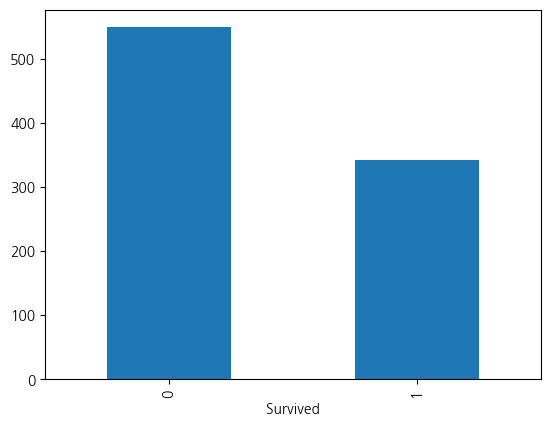

In [44]:
data['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

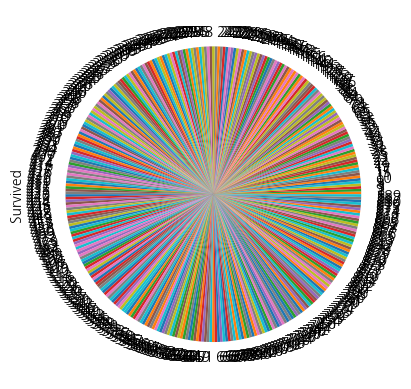

In [46]:
data['Survived'].plot(kind='pie')

<Axes: ylabel='count'>

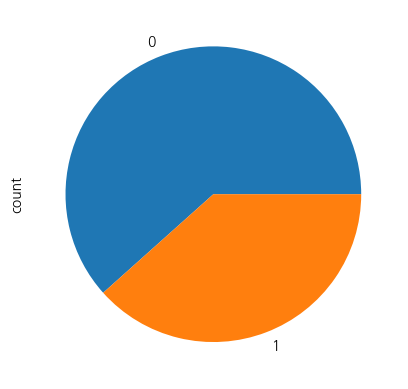

In [47]:
data['Survived'].value_counts().plot(kind='pie')

In [49]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

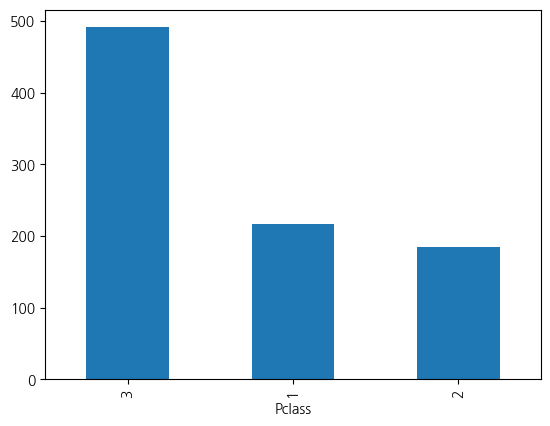

In [50]:
data['Pclass'].value_counts().plot(kind='bar')

In [51]:
# 데이터 컬럼의 유니크값
data['Name'].nunique()

891

In [52]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

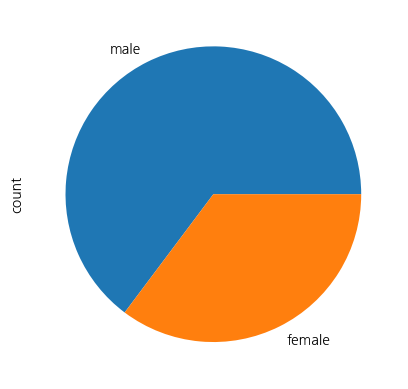

In [53]:
data['Sex'].value_counts().plot(kind='pie')

In [54]:
# 나이
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [56]:
# 891개 중에 결측값에fillna했던 값의 count가 가장 많은점
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

<Axes: ylabel='Frequency'>

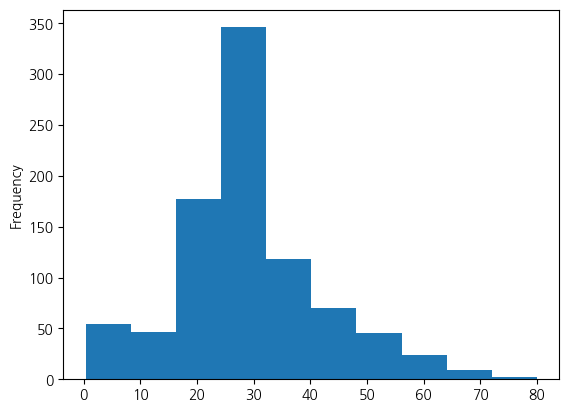

In [57]:
data['Age'].plot(kind='hist') 
# 수치형 그래프중 히스토그램의 경우 왼쪽으로 치우쳐진점 볼 수 있음.

In [60]:
# 나이 다음 컬럼
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
data['SibSp'] # 형제자매 수

<Axes: xlabel='SibSp'>

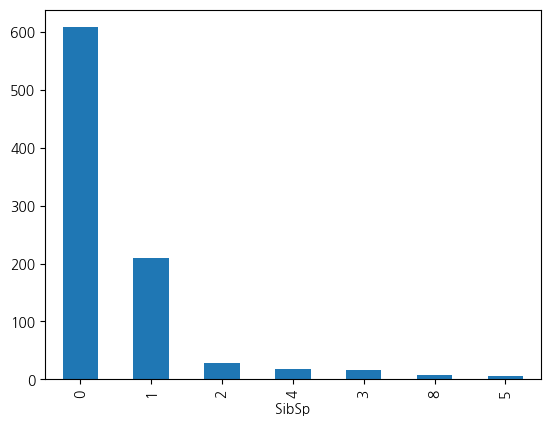

In [63]:
# 탑승객 형제자매수의 막대그래프 시각화
data['SibSp'].value_counts().plot(kind='bar')

In [64]:
# 부모자식 수
data['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [65]:
# 부모자식 수 (우열이 없는 컬럼이므로 수치화에는 적합하지 않음)
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: ylabel='count'>

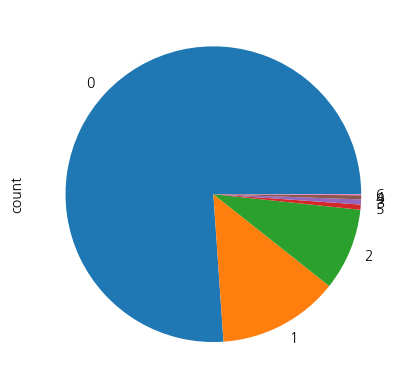

In [67]:
data['Parch'].value_counts().plot(kind='pie')

In [68]:
# 티켓 - 범주형 - value_counts()
data['Ticket'].value_counts()

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: int64

In [69]:
# Fare 도 수치형
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [71]:
# Fare 도 수치형
data['Fare'].nunique()

248

<Axes: ylabel='Frequency'>

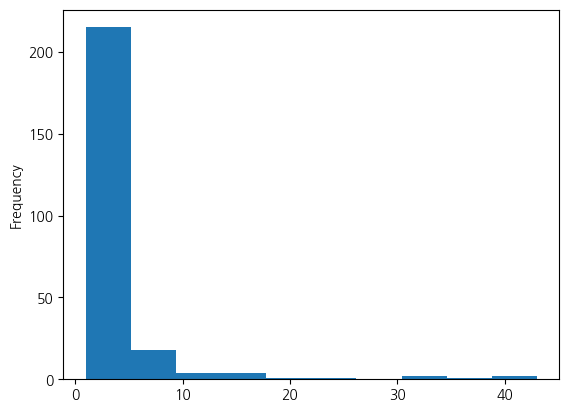

In [73]:
# Fare 도 수치형
data['Fare'].value_counts().plot(kind='hist')

In [77]:
# describe로 이상치 파악
fare_desc=data['Fare'].describe()
fare_desc

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [76]:
# 이상치의 맥스값 찾기
fare_desc.loc['75%']

np.float64(31.0)

In [78]:
# 상한선 구하기
maximum= fare_desc.loc['75%'] + (1.5 * (fare_desc.loc['75%'] - fare_desc.loc['25%']))

In [79]:
outliers= data[data['Fare'] > maximum] 
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [82]:
#groupby를 이용해 클래스별 Fare보기
pc_fare_desc = data[['Pclass','Fare']].groupby('Pclass').describe()
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [83]:
pc_fare_desc.columns

MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [84]:
pclass_1_max= pc_fare_desc.loc[1, ('Fare',   '75%')]

In [85]:
pclass_1_max

np.float64(93.5)

In [89]:
# pclass1의 상한값
pc1_max= pc_fare_desc.loc[1, ('Fare',   '75%')] + (1.5* (pc_fare_desc.loc[1, ('Fare',   '75%')]- pc_fare_desc.loc[1, ('Fare',   '25%')]))
pc2_max= pc_fare_desc.loc[2, ('Fare',   '75%')] + (1.5* (pc_fare_desc.loc[2, ('Fare',   '75%')]- pc_fare_desc.loc[2, ('Fare',   '25%')]))
pc3_max= pc_fare_desc.loc[3, ('Fare',   '75%')] + (1.5* (pc_fare_desc.loc[3, ('Fare',   '75%')]- pc_fare_desc.loc[3, ('Fare',   '25%')]))

In [90]:
data[(data['Pclass']==1) & (data['Fare']>pc1_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [90]:
# 상한가보다 금액이 큰 경우를 df로.
data[(data['Pclass']==1) & (data['Fare']>pc1_max)]

# 일행과 함께 승선한 경우 가격이 상한가를 초과했을 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [92]:
# 2등석 
data[(data['Pclass']==2) & (data['Fare']>pc2_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,S


In [91]:
# 3등석 
data[(data['Pclass']==3) & (data['Fare']>pc3_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,S
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,S
86,87,0,3,"Ford, Mr. William Neal",male,16.000000,1,3,W./C. 6608,34.3750,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,S


In [93]:
# Fare 다음이 Embarked 
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

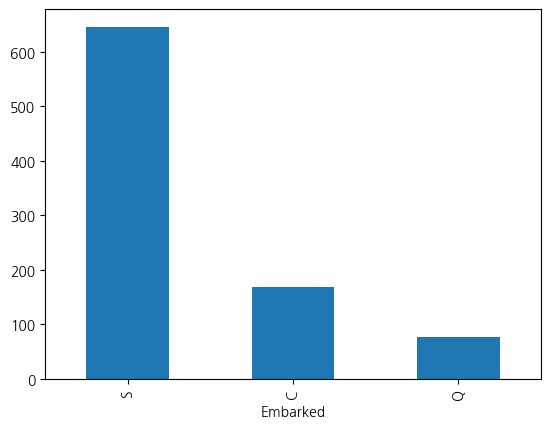

In [94]:
data['Embarked'].value_counts().plot(kind='bar')

- 형제자매와 부모자녀에 관한 내용은 카테고리로 변환하는 작업 해야겠다고 판단할수있음
# 종속변수와 독립변수<br> Survived(종속변수) 외 나머지 컬럼(독립변수)<br> groupby를 통하여 파악하기

In [95]:
data.columns # 생존했는지 알고자할때

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Pclass는 생존율에 영향을 미침**
선실 등급이 1이면 높고 3이면 낮다

In [97]:
data[['Pclass','Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [98]:
# 컬럼들을 모두 넣어야할때
clolumnss= data.columns
for col in clolumnss:
    print(data[['Pclass','Survived']].groupby(col).mean())

KeyError: 'PassengerId'

In [ ]:
# 성별의 경우 여자가 남성보다 생존율이 높다
data[['Sex','Survived']].groupby('Sex').mean()

In [99]:
# 나이의 경우 여자가 남성보다 생존율이 높다
data[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


### 나이대별로 구간화하기
중간 나이대는 생략되고있음
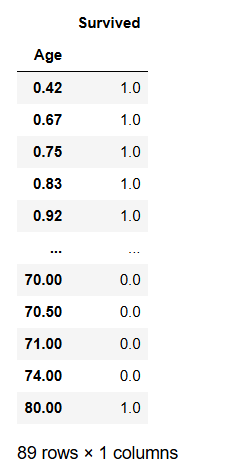

**나이와 생존율의 관계를 파악하기 위해**
- 나이의 구간화
    - 10, 20, 30, 40, 50
    - 0 - 10 under10s
    - 10 - 19 10s
    - 20 - 29 20s
   
    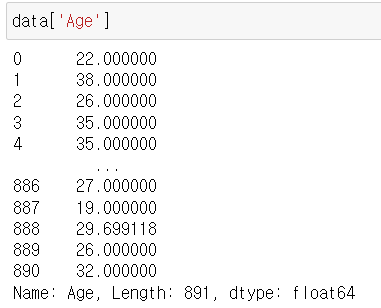

In [101]:
def age_cat(x):
    if x < 10:
        return "under10s"
    elif 9 < x < 20:
        return "10s"
    elif 19 < x < 30:
        return "20s"
    elif 29 < x < 40:
        return "30s"
    elif 39 < x < 50:
        return "40s"
    elif 49 < x < 60:
        return "50s"
    elif 59 < x < 70:
        return "60s"
    elif 69 < x < 80:
        return "70s"
    elif 79 < x < 90:
        return "80s"

In [102]:
data['age_cat']= data['Age'].apply(age_cat)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30s


**연령대별 생존율 구하기**

In [105]:
data[['age_cat','Survived']].groupby('age_cat').mean().sort_values(by='Survived',ascending=False)

,Survived
age_cat,
80s,1.000000
under10s,0.612903
30s,0.437126
50s,0.416667
10s,0.401961
40s,0.382022
20s,0.324937
60s,0.315789
70s,0.000000


In [106]:
data['age_cat'].value_counts()

age_cat
20s         397
30s         167
10s         102
40s          89
under10s     62
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64

### 형제자매 수에 따라 생존율차이

In [108]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat'],
      dtype='object')

In [113]:
data[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [114]:
data[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [115]:
data[['Ticket','Survived']].groupby('Ticket').mean().sort_values(by='Survived',ascending=False)

,Survived
Ticket,
111361,1.0
112053,1.0
330923,1.0
330931,1.0
330932,1.0
...,...
113043,0.0
113050,0.0
113051,0.0


In [116]:
# Fare는 선실등급별로 가격이달라지니 그것에 맞게 가격대를 쪼개야함.
data[['Fare','Survived']].groupby('Fare').mean().sort_values(by='Survived',ascending=False)

,Survived
Fare,
7.1417,1.0
8.1125,1.0
8.5167,1.0
8.6833,1.0
8.0292,1.0
...,...
69.5500,0.0
61.1750,0.0
50.4958,0.0


In [108]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat'],
      dtype='object')

In [117]:
# Fare는 선실등급별로 가격이달라지니 그것에 맞게 가격대를 쪼개야함.
data[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [118]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### pclass, sex, age_cat 동시에 적용해보면

In [123]:
data[['Pclass','Sex','age_cat','Survived']].groupby(['Pclass','Sex','age_cat']).mean().sort_values(by='Survived',ascending=False)

Survived
Pclass Sex    age_cat           
1      female 10s       1.000000
              30s       1.000000
              40s       1.000000
              60s       1.000000
2      female under10s  1.000000
              10s       1.000000
       male   under10s  1.000000
3      female 60s       1.000000
1      male   80s       1.000000
              under10s  1.000000
       female 20s       0.960000
2      female 30s       0.941176
1      female 50s       0.916667
2      female 40s       0.900000
              20s       0.888889
              50s       0.833333
3      female 20s       0.547945
              10s       0.541667
              under10s  0.523810
1      male   30s       0.521739
3      female 30s       0.437500
1      male   10s       0.400000
3      male   under10s  0.380952
1      male   40s       0.375000
              20s       0.358974
2      male   60s       0.333333
1      male   50s       0.266667
3      male   30s       0.150943
              20s       0.127551
2      male   40s       0.125000
1      male   60s       0.100000
2      male   10s       0.100000
              30s       0.096774
3      male   10s       0.095238
              40s       0.080000
2      male   20s       0.054054
1      female under10s  0.000000
       male   70s       0.000000
2      male   50s       0.000000
              70s       0.000000
3      female 40s       0.000000
       male   50s       0.000000
              60s       0.000000
              70s       0.000000

In [131]:
# 1등실 여자 어린이가 아예 없었는지 수치확인하고싶음
data[['Age','Sex'],('Sex'=='female')].value_counts()

InvalidIndexError: (['Age', 'Sex'], False)

# 데이터의 구간화를 쉽게 해주는 함수 cut
- 이 함수를 쓰게되면 
- 형식) pd.cut(data['Age'],bins=[구간],labels['구간의 이름'])

In [134]:
pd.cut(data['Age'], bins=[0,10,20,30,40,50,60,70,80,90],
      labels=['under 10s','10s','20s','30s','40s','50s','60s','70s','80s'])

0      20s
1      30s
2      20s
3      30s
4      30s
      ... 
886    20s
887    10s
888    20s
889    20s
890    30s
Name: Age, Length: 891, dtype: category
Categories (9, object): ['under 10s' < '10s' < '20s' < '30s' ... '50s' < '60s' < '70s' < '80s']

In [135]:
# 새컬럼에 담아주기
data['age_cat2']=pd.cut(data['Age'], bins=[0,10,20,30,40,50,60,70,80,90],
      labels=['under 10s','10s','20s','30s','40s','50s','60s','70s','80s'])

In [136]:
data[['age_cat','age_cat2']]

,age_cat,age_cat2
0,20s,20s
1,30s,30s
2,20s,20s
3,30s,30s
4,30s,30s
...,...,...
886,20s,20s
887,10s,10s
888,20s,20s
889,20s,20s


## 변수들 간 상관관계 보기 .corr()
```data[['Parch', 'Fare' 등등 ]].corr(method="spearman")```<br>
- pclass와 Fare은 상관관계가 강해서 둘중 하나만 남겨야하는데 이런 수치화 컬럼의 상관관계를 보여주는 함수가 있음
- 수치값의 범위: -1, 0, 1
    - -1은 음의 상관관계 ( 반비례. 집과 역의 거리가 늘어나면 가격이 줄어든다 )
    - 0은 관계 없음
    - 1은 양의 상관관계 ( 정비례. 기온이 올라가면 빙과판매량도 올라간다 ) 
<br><br>
- 메서드에 기본적으로 피어슨이적용됨.
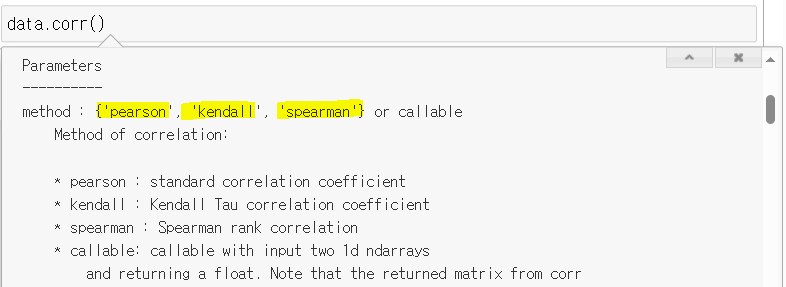

In [137]:
data.columns # 함수 적용 가능한 컬럼은 문자가 포함되어서는 안됨

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

In [142]:
# 카테고리 변수로 바꿔서 
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']].corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041560,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,0.041560,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,-0.061161,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000
